#### Dipayan Mukhopadhyay
#### dipayan.m2@tcs.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colnames=['Age','Year','PosAxNodes','Status']
dataset = pd.read_csv('haberman.csv',names=colnames,header=None)

### Dataset Description
- Age of Patient at the time of operation ('Age')
- Year on which operation was performed ('Year')
- Number of Positive Axillary Nodes detected at the time of operation ('PosAxNodes')
- Survival Status ('Status')
 - Patient Survived more than 5 years(1)
 - Patient unfortunately died in 5 years(2)

### Statistical information about the dataset is as follows

In [2]:
dataset.describe()

,Age,Year,PosAxNodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [3]:
dataset.shape

(306, 4)

#### We have total 306 number of entries

In [4]:
dataset['Status'].value_counts()

1    225
2     81
Name: Status, dtype: int64

#### Total 306 entries are divideed into two parts
- 225 entries related to class 1,patients who could survive more than 5 years
- 81 entries related to class 2,patients who had unfortunate death before 5 years



### Our Objective is to analyse the chance of a paient's survival based on the 3 features given here

### First we will do the univariate analysis of the three features

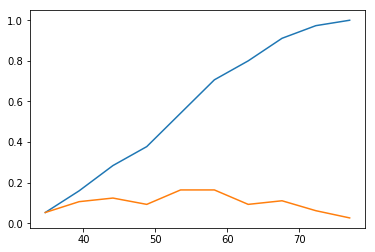

In [5]:
## Pdf and cdf of Age for class 1

count1,bin_edges1 = np.histogram(dataset['Age'][dataset['Status']==1])
count2,bin_edges2 = np.histogram(dataset['Age'][dataset['Status']==2])

pdf1=count1/sum(count1)
pdf2=count2/sum(count2)

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)

plt.plot(bin_edges1[1:],cdf1)
plt.plot(bin_edges1[1:],pdf1)

plt.show()



#### Almost 75% of the patients who survived more than 5 years after operation were having age less than 60 years

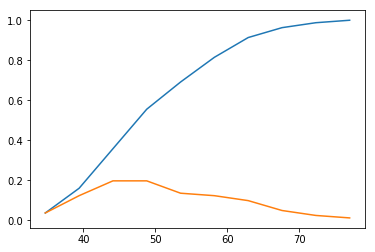

In [6]:
#pdf and cdf of Age for class 2
plt.plot(bin_edges1[1:],cdf2)
plt.plot(bin_edges1[1:],pdf2)

plt.show()


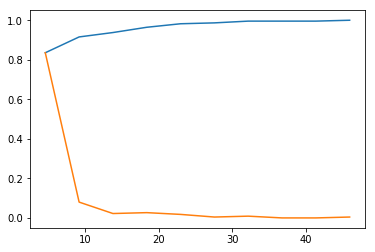

In [7]:
#Pdf & Cdf for Number of Positive Axilary Nodes detected for class1
count1,bin_edges1 = np.histogram(dataset['PosAxNodes'][dataset['Status']==1])
count2,bin_edges2 = np.histogram(dataset['PosAxNodes'][dataset['Status']==2])

pdf1=count1/sum(count1)
pdf2=count2/sum(count2)

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)

plt.plot(bin_edges1[1:],cdf1)
plt.plot(bin_edges1[1:],pdf1)

plt.show()


#### Almost 85% of the survivers had positive Axilary Nodes less than 5

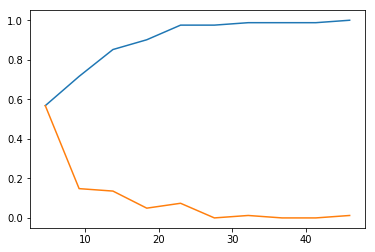

In [8]:
#Pdf & Cdf for Number of Positive Axilary Nodes detected for class2
plt.plot(bin_edges1[1:],cdf2)
plt.plot(bin_edges1[1:],pdf2)

plt.show()

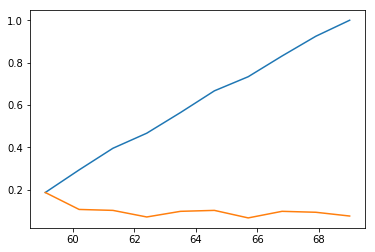

In [9]:
##pdf and cdf of year for class 1
count1,bin_edges1 = np.histogram(dataset['Year'][dataset['Status']==1])
count2,bin_edges2 = np.histogram(dataset['Year'][dataset['Status']==2])

pdf1=count1/sum(count1)
pdf2=count2/sum(count2)

cdf1=np.cumsum(pdf1)
cdf2=np.cumsum(pdf2)

plt.plot(bin_edges1[1:],cdf1)
plt.plot(bin_edges1[1:],pdf1)

plt.show()


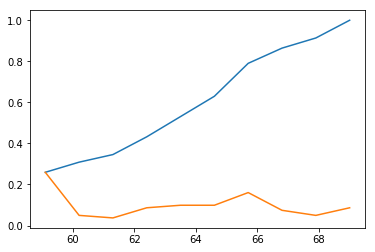

In [10]:
##pdf and cdf of year on class 2
plt.plot(bin_edges1[1:],cdf2)
plt.plot(bin_edges1[1:],pdf2)

plt.show()


#### 80% of the patients who died before 5 years had their operation before 1966

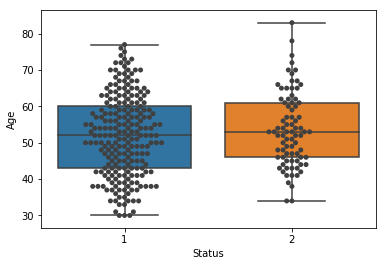

In [11]:
sns.boxplot(x='Status',y='Age',data=dataset)
sns.swarmplot(x='Status',y='Age',data=dataset,color='0.25')
plt.show()

#### 75% of the patients who could not survive more than 5 years were having age more than around 45 years

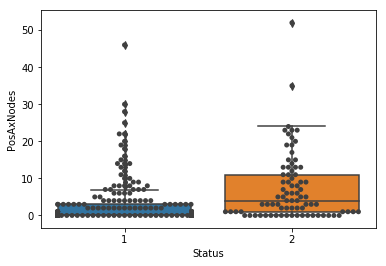

In [12]:
sns.boxplot(x='Status',y='PosAxNodes',data=dataset)
sns.swarmplot(x='Status',y='PosAxNodes',data=dataset,color='0.25')
plt.show()

#### 50% of the patients who could not survive were having Positive Axilary nodes more than 10

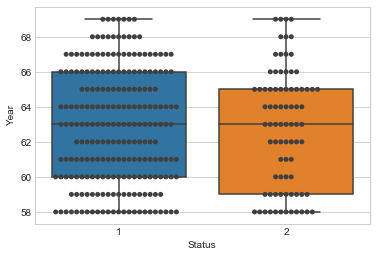

In [17]:
sns.boxplot(x='Status',y='Year',data=dataset)
sns.swarmplot(x='Status',y='Year',data=dataset,color='0.25')
plt.show()

#### 50% of the patients who survived had their operation on or after 1963

[]

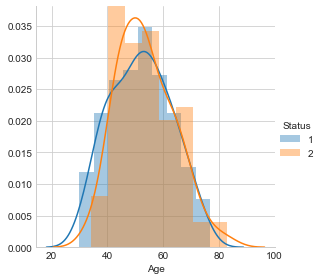

In [18]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Status',size=4).map(sns.distplot,'Age').add_legend()
plt.plot()

In [25]:
print('Mean age of the patients who survived is ',np.mean(dataset['Age'][dataset['Status']==1]))
print('Mean age of the patients who could not survive is ',np.mean(dataset['Age'][dataset['Status']==2]))

Mean age of the patients who survived is  52.01777777777778
Mean age of the patients who could not survived is  53.67901234567901


[]

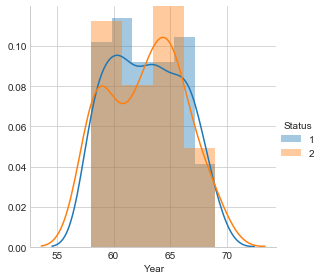

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Status',size=4).map(sns.distplot,'Year').add_legend()
plt.plot()

[]

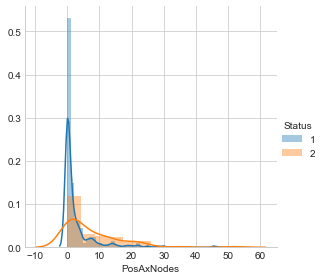

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Status',size=4).map(sns.distplot,'PosAxNodes').add_legend()
plt.plot()

In [27]:
print('Mean Positive Axillary Nodes of the patients who survived is ',np.mean(dataset['PosAxNodes'][dataset['Status']==1]))
print('Mean Positive Axillary Nodes of the patients who could not survive is ',np.mean(dataset['PosAxNodes'][dataset['Status']==2]))

Mean Positive Axillary Nodes of the patients who survived is  2.7911111111111113
Mean Positive Axillary Nodes of the patients who could not survive is  7.45679012345679


#### Number of Positive Axillary Nodes are important feature for this classification

#### Observations from Univariate analysis
- Age is an important parameter. 75% of the patients who could not survive more than 5 years were having age more than around 45 years and almost 75% of the patients who survived more than 5 years after operation were having age less than 60 years


- Though most of the entries are having Positive Axillary Nodes 0 it can also be important feature. As we see 50% of the patients who could not survive were having Positive Axilary nodes more than 10 and almost 85% of the survivers had Positive Axilary Nodes less than 5


- 80% of the patients who died before 5 years had their operation before 1966 and 50% of the patients who survived had their operation on or after 1963

### Bivariate analysis

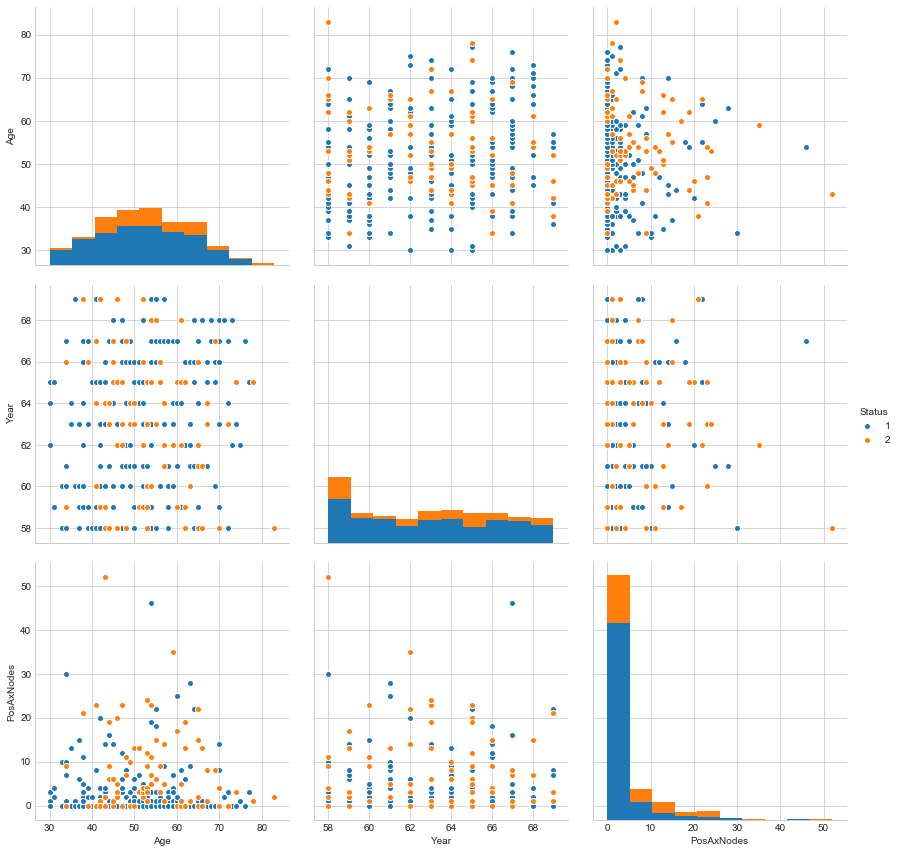

In [2]:
sns.set_style('whitegrid')
sns.pairplot(dataset,hue='Status',vars=['Age',"Year",'PosAxNodes'],size=4)
plt.show()

[]

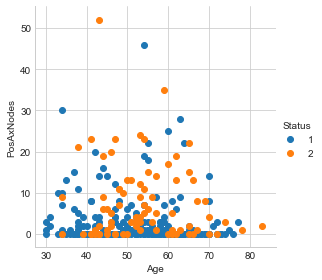

In [22]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Status',size=4).map(plt.scatter,'Age','PosAxNodes').add_legend()
plt.plot()

[]

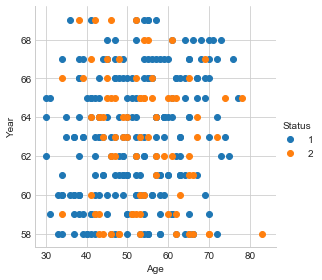

In [23]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Status',size=4).map(plt.scatter,'Age','Year').add_legend()
plt.plot()

[]

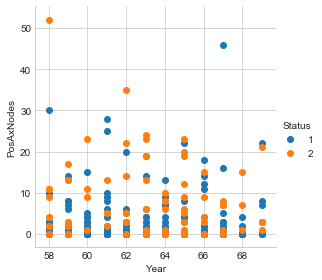

In [24]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Status',size=4).map(plt.scatter,'Year','PosAxNodes').add_legend()
plt.plot()

#### Conclusion
- Patients having age lesser than 40 with Positive Axillary Nodes Lesser than 2-3 and having operaton on or after 1970's are more likely to survive more than 5 years.
- Patients having age more than 60 with Positive Axilary Nodes more than 10 and having operation before 1962 are more likely to not survive for 5 years unfortunately

#### Improvement Ideas
- The model could be improved with more number of data points
- Classification models can be built with KNN,SVM